1) Importando o TensorFlow e verificando a sua versão

In [42]:
import tensorflow as tf
tf.__version__

'2.4.1'

2) Importando o Banco de Dados e Descompactando os dígitos escritos a mão de 0 a 9 para as variáveis de treinamento e teste:

In [43]:
mnist = tf.keras.datasets.mnist #Import Data Set
(x_train, y_train), (x_test, y_test) = mnist.load_data() #Unpacking

3) Vizualização e plotagem antes da normalização

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

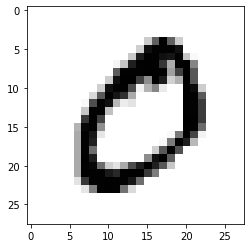

In [44]:
import matplotlib.pyplot as plt
print(x_train[1])
plt.imshow(x_train[1], cmap = plt.cm.binary)
plt.show()

4) Normalização dos dados:

In [45]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

5) Vizualização e plotagem depois da normalização

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

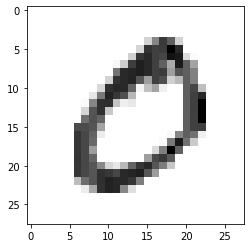

In [46]:
import matplotlib.pyplot as plt
print(x_train[1])
plt.imshow(x_train[1], cmap = plt.cm.binary)
plt.show()

6) Desenvolvendo o Modelo

    a) Inicialização da rede neural.

In [47]:
model = tf.keras.models.Sequential() 

    b) Criando a primeira camada.

In [48]:
model.add(tf.keras.layers.Flatten())

    c) Criando as Hidden Layers e aplicando a função ReLu, ou "Rectified Linear Unit".

In [49]:
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))

    d) Criando a Output layer e utilizando a softmax function.


In [50]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    e) Compiling

In [51]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

7) Training the model

    Aqui meu PC fez um barulho estranho

In [52]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 997us/step - loss: 0.3869 - accuracy: 0.8805
Epoch 2/10
1875/1875 [==============================] - 2s 964us/step - loss: 0.0967 - accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 2s 996us/step - loss: 0.0607 - accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 2s 938us/step - loss: 0.0429 - accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 2s 980us/step - loss: 0.0379 - accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 2s 942us/step - loss: 0.0279 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 2s 943us/step - loss: 0.0241 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 2s 953us/step - loss: 0.0202 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 2s 972us/step - loss: 0.0190 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 2s 958u

8) Cálculo da "Validation loss" e da "Validation accuracy

In [53]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(val_loss, val_accuracy)

313/313 [==============================] - 0s 486us/step - loss: 0.1038 - accuracy: 0.9789
0.10383564233779907 0.9789000153541565


9) Saving the model and reloading the model

In [54]:
model.save('num_reader')
new_model = tf.keras.models.load_model('num_reader')

INFO:tensorflow:Assets written to: num_reader\assets


10) Making a prediction 

In [55]:
predictions = new_model.predict([x_test])
print(predictions) #These will print one hot arrays(probability distributions) 


[[1.0140945e-15 1.2351219e-16 1.3535778e-08 ... 1.0000000e+00
  2.6655428e-15 1.0759922e-13]
 [1.0707321e-18 1.4724836e-17 1.0000000e+00 ... 7.0289772e-18
  3.6197258e-18 8.0277745e-25]
 [6.7010936e-16 1.0000000e+00 7.4285675e-11 ... 8.2031293e-10
  6.4947070e-10 6.2228917e-13]
 ...
 [2.7271725e-15 2.8913053e-12 5.2860116e-11 ... 5.1197663e-10
  3.1597468e-11 8.2220248e-09]
 [6.4671350e-12 1.6218572e-19 2.1942010e-19 ... 1.0510728e-17
  8.3487982e-12 9.7742022e-16]
 [5.7933719e-10 6.4655208e-19 5.8203147e-19 ... 4.6045687e-17
  4.6480157e-14 4.8242653e-14]]


11) Using NumPy to find a prediction from the distributions

In [56]:
import numpy as np
print(np.argmax(predictions[3]))
print(np.argmax(predictions[2]))
print(np.argmax(predictions[1]))

0
1
2


12) Vizualizing the prediction

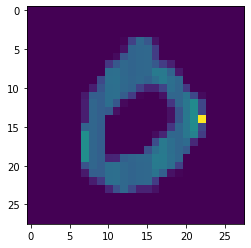

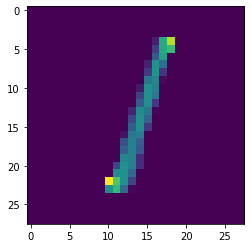

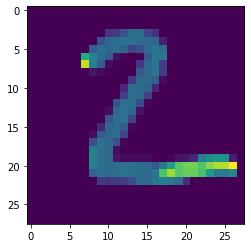

In [57]:
plt.imshow(x_test[3])
plt.show()
plt.imshow(x_test[2])
plt.show()
plt.imshow(x_test[1])
plt.show()